In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from grid import Coord, Cell

In [3]:
def get_arr(params):
    size = params["size"]
    r = params["r"]
    with open(f"../data/r:{r}_size:{size[0]}x{size[1]}.out") as f:
        arr = [int(a) for a in f.readline()[:-1].split(' ')]
    
    return np.array(arr, dtype=int)

In [4]:
def plot_cells(grid, arr, node=-1):
    for ind,c in grid.get_cells():
        if ind in arr:
            x = [t.x for t in c.node_coords]
            y = [t.y for t in c.node_coords]
            plt.fill(x,y, facecolor='b')
            
    if node > -1:
        for u,v in G.edges:
            c1 = grid.cells[u//shape[0]][u%shape[1]].center
            c2 = grid.cells[v//shape[0]][v%shape[1]].center
            if((u == node) or (v == node)):
                plt.plot([c1.x, c2.x], [c1.y, c2.y])

In [5]:
graph = nx.Graph()
c = Cell([0.0, 0.0], 4, 1.0, base_dir = 1)
print(c.node_coords)

[(-1.000, 0.000), (-0.000, -1.000), (1.000, -0.000), (0.000, 1.000)]


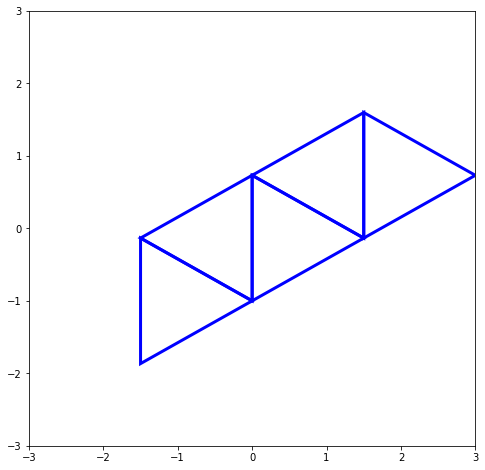

In [6]:
c1 = Cell([-1.0, -1.0], 3, 1.0, base_dir = 0)
c2 = Cell(c1.shift(0), 3, 1.0, base_dir = 1)
c3 = Cell(c2.shift(1), 3, 1.0, base_dir = 0)
c4 = Cell(c3.shift(0), 3, 1.0, base_dir = 1)
c5 = Cell(c4.shift(1), 3, 1.0, base_dir = 0)

plt.figure(figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
for c in [c1,c2, c3, c4, c5]:
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, facecolor='none',edgecolor='blue', linewidth=3)

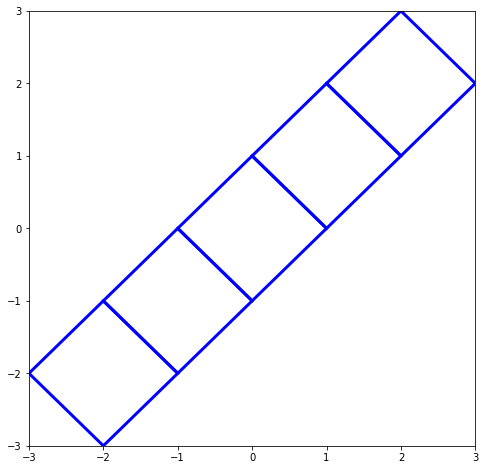

In [7]:
c1 = Cell([2.0, 2.0], 4, 1.0, base_dir = 1)
c2 = Cell(c1.shift(0), 4, 1.0, base_dir = 1)
c3 = Cell(c2.shift(0), 4, 1.0, base_dir = 1)
c4 = Cell(c3.shift(0), 4, 1.0, base_dir = 1)
c5 = Cell(c4.shift(0), 4, 1.0, base_dir = 1)

plt.figure(figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
for c in [c1,c2, c3, c4, c5]:
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, facecolor='none',edgecolor='blue', linewidth=3)

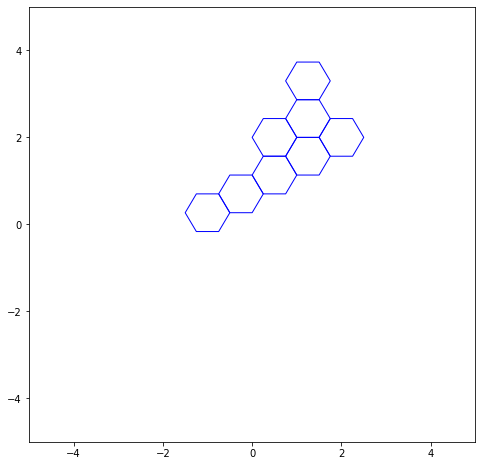

In [8]:
l = 0.5
c1 = Cell([2.0, 2.0], 6, l, base_dir = 1)
c2 = Cell(c1.shift(0), 6, l, base_dir = 1)
c3 = Cell(c2.shift(0), 6, l, base_dir = 1)
c4 = Cell(c3.shift(0), 6, l, base_dir = 1)
c5 = Cell(c4.shift(0), 6, l, base_dir = 1)

c6 = Cell(c1.shift(-1), 6, l, base_dir = 1)
c7 = Cell(c6.shift(0), 6, l, base_dir = 1)
c8 = Cell(c6.shift(-2), 6, l, base_dir = 1)

plt.figure(figsize=(8,8))
plt.xlim(-5,5)
plt.ylim(-5,5)
for c in [c1,c2, c3, c4, c5, c6, c7, c8]:
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, edgecolor='b', facecolor='none')
    #plt.fill(x,y, facecolor='none',edgecolor='blue')

In [9]:
from sparse import HexagonGrid, create_graph

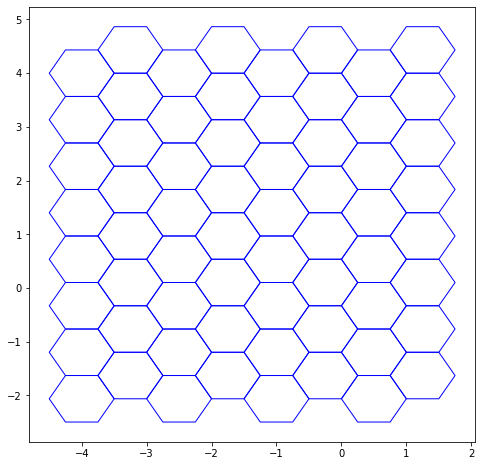

In [10]:
grid = HexagonGrid([-4,4], 0.5, 8, 8)
plt.figure(figsize=(8,8))
#plt.xlim(-5,5)
#plt.ylim(-5,5)
for _,c in grid.get_cells():
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, edgecolor='b', facecolor='none')
    #plt.fill(x,y, facecolor='b')
    #plt.fill(x,y, facecolor='none',edgecolor='blue')

Patt begin
Patt end


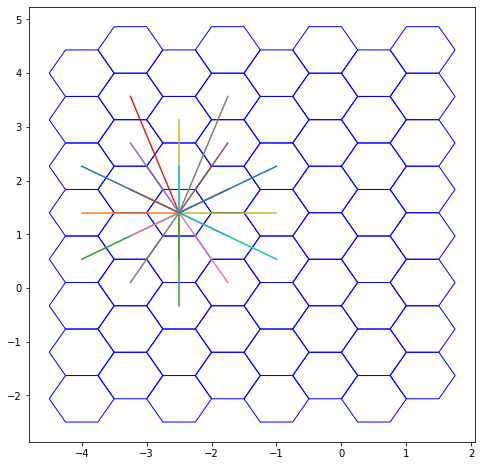

In [11]:
r = 0.5
grid = HexagonGrid([-4,4], r, 8, 8)
G = create_graph(grid.cells, r)

plt.figure(figsize=(8,8))
for _,c in grid.get_cells():
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, edgecolor='b', facecolor='none')

shape = np.shape(grid.cells)
for u,v in G.edges:
    c1 = grid.cells[u//shape[0]][u%shape[1]].center
    c2 = grid.cells[v//shape[0]][v%shape[1]].center
    
    if((u == 19) or (v ==19)): 
        plt.plot([c1.x, c2.x], [c1.y, c2.y])

In [12]:
from sparse import SquareGrid

In [13]:
r = 0.2
grid = SquareGrid([-4,4], r, 10, 10)
G = create_graph(grid.cells, r)
print(len(G.nodes), len(G.edges))

Patt begin
Patt end
100 2800


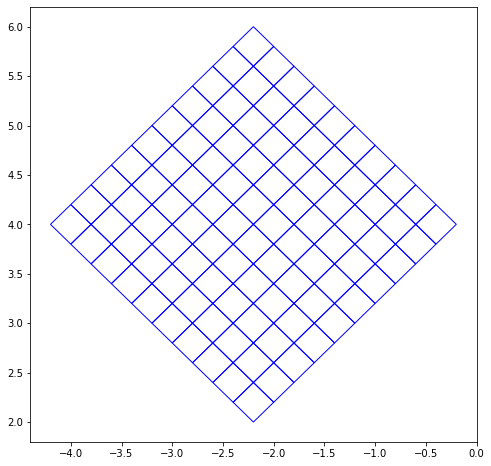

In [14]:
plt.figure(figsize=(8,8))
for _,c in grid.get_cells():
    x = [t.x for t in c.node_coords]
    y = [t.y for t in c.node_coords]
    
    plt.fill(x,y, edgecolor='b', facecolor='none')

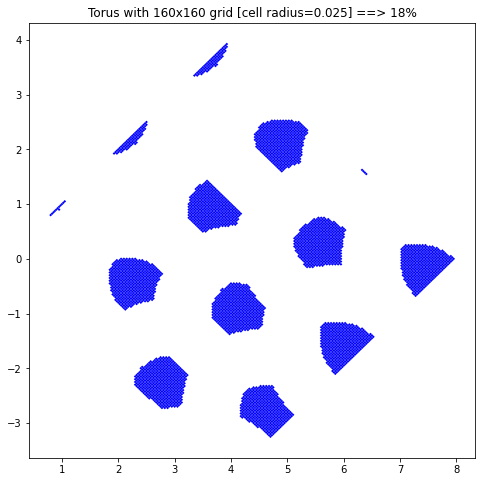

In [37]:
params = {"r":0.025, "size":160}
grid = SquareGrid([0,0], params["r"], params["size"], params["size"])

arr = get_arr(params)
plt.figure(figsize=(8,8))
plot_cells(grid, arr)
plt.title(f"Torus with {params['size']}x{params['size']} grid [cell radius={params['r']}] ==> 18%")
plt.show()

In [38]:
params_big = {"r":0.01, "size":3200}
grid = SquareGrid([0,0], params_big["r"], params_big["size"], params_big["size"])

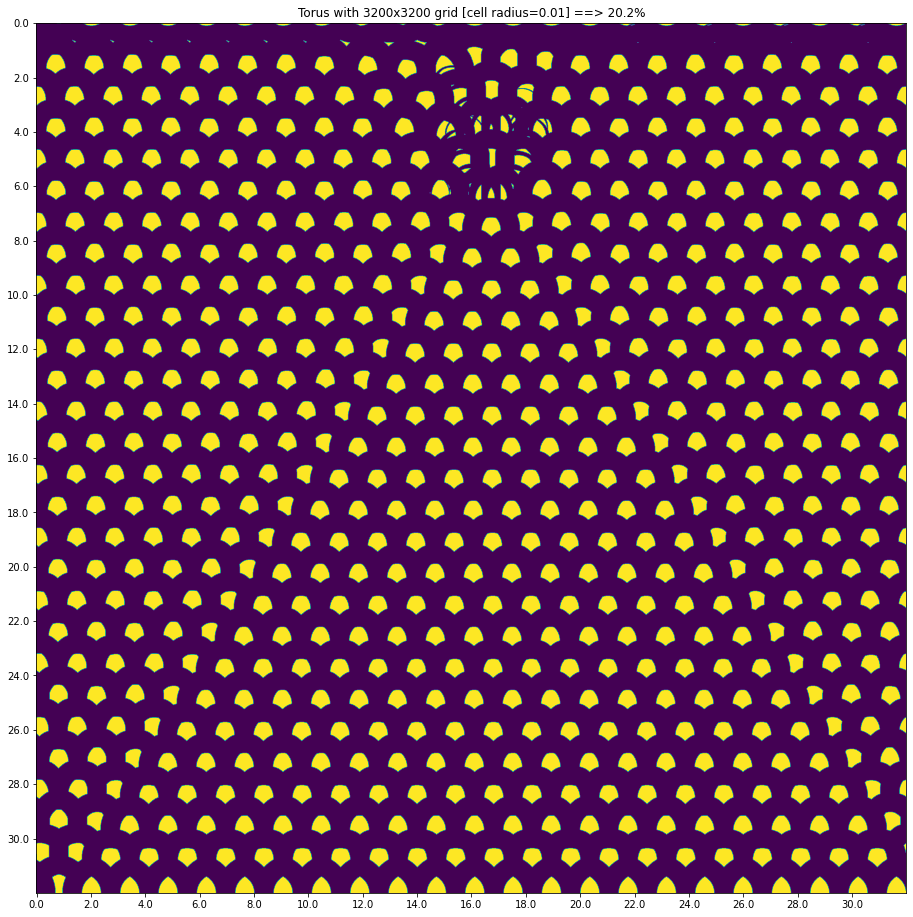

In [89]:
arr = get_arr(params_big)
plt.figure(figsize=(16,16))
N = params_big["size"]
r = params_big["r"]

img = np.zeros(N*N)
arr = np.array(arr, dtype=int)
img[arr]=1
plt.imshow(img.reshape(N,N))
plt.title(f"Torus with {params_big['size']}x{params_big['size']} grid [cell radius={params_big['r']}] ==> 20.2%");
plt.xticks(np.arange(0,N,200), [str(a) for a in np.arange(0,N,200)*r]);
plt.yticks(np.arange(0,N,200), [str(a) for a in np.arange(0,N,200)*r]);

In [51]:
params_big2 = {"r":0.02, "size":800}
grid = SquareGrid([0,0], params_big2["r"], params_big2["size"], params_big2["size"])

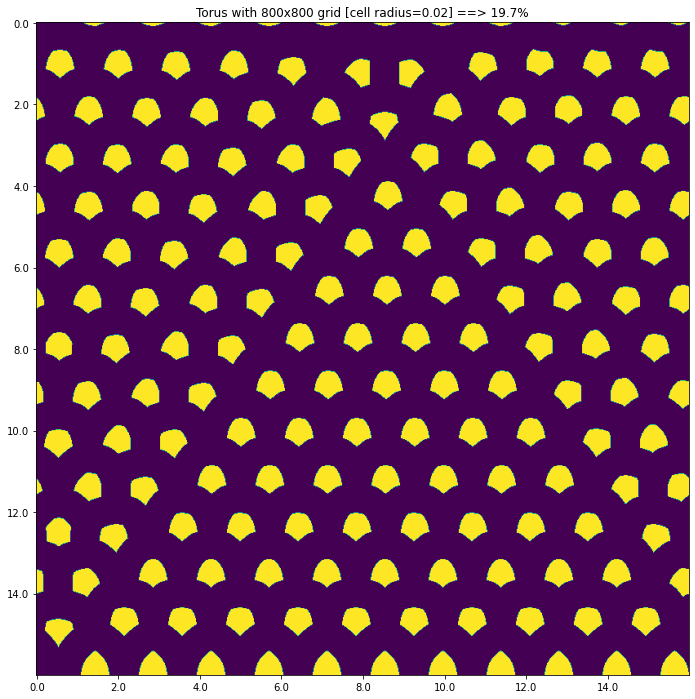

In [86]:
arr = np.array(get_arr(params_big2), dtype=int)
plt.figure(figsize=(12,12))
N = params_big2["size"]
r = params_big2["r"]

img = np.zeros(N*N)
img[arr]=1
plt.imshow(img.reshape(N,N))
plt.title(f"Torus with {params_big2['size']}x{params_big2['size']} grid [cell radius={params_big2['r']}] ==> 19.7%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);

In [55]:
params_big3 = {"r":0.01, "size":400}
grid = SquareGrid([0,0], params_big3["r"], params_big3["size"], params_big3["size"])

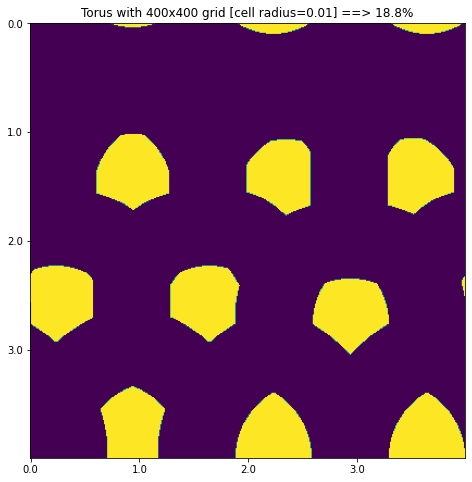

In [87]:
arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(8,8))
N = params_big3["size"]
r = params_big3["r"]

img = np.zeros(N*N)
img[arr]=1
plt.imshow(img.reshape(N,N))
plt.title(f"Torus with {params_big3['size']}x{params_big3['size']} grid [cell radius={params_big3['r']}] ==> 18.8%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);

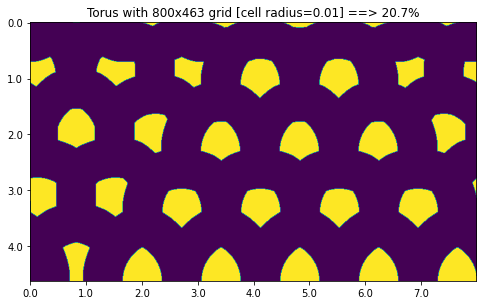

In [100]:
params_big3 = {"r":0.01, "size":(800, 463)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(8,int(np.sqrt(3)*8)))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 20.7%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

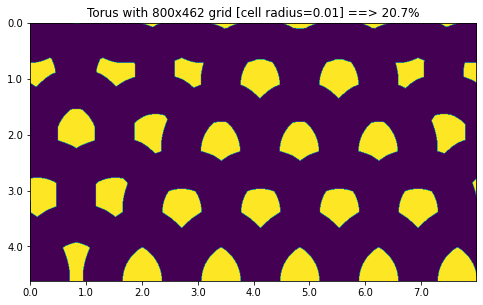

In [101]:
params_big3 = {"r":0.01, "size":(800, 462)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(8,int(np.sqrt(3)*8)))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 20.7%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

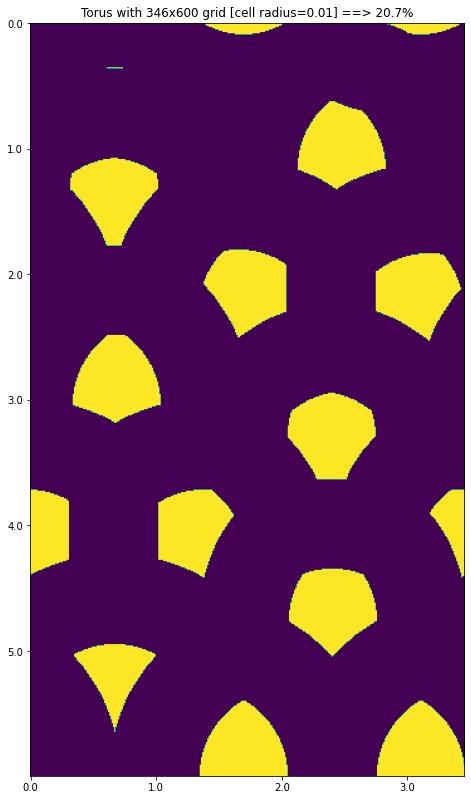

In [107]:
params_big3 = {"r":0.01, "size":(346, 600)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(3*8,np.sqrt(3)*8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 20.7%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

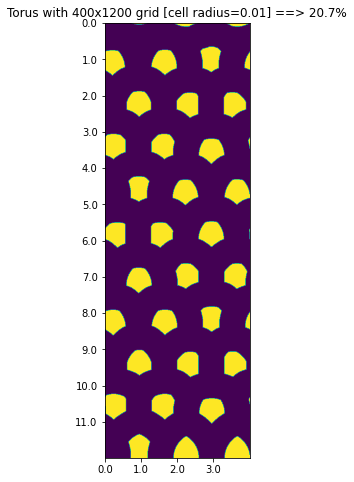

In [110]:
params_big3 = {"r":0.01, "size":(400,1200)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(3*8,8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 20.7%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

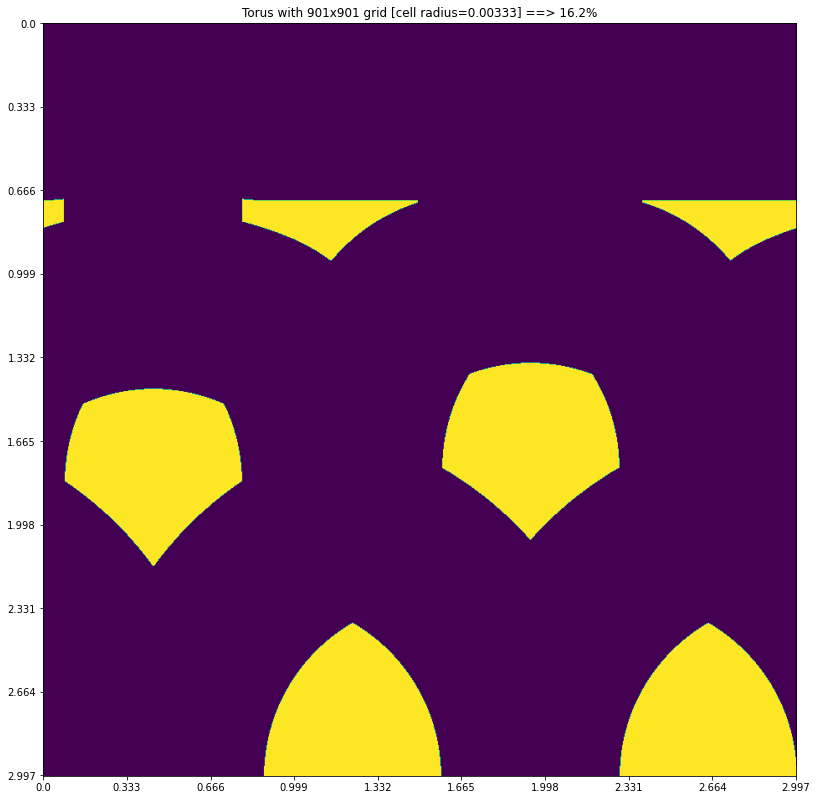

In [16]:
params_big3 = {"r":0.00333, "size":(901, 901)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(3*8,np.sqrt(3)*8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 16.2%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

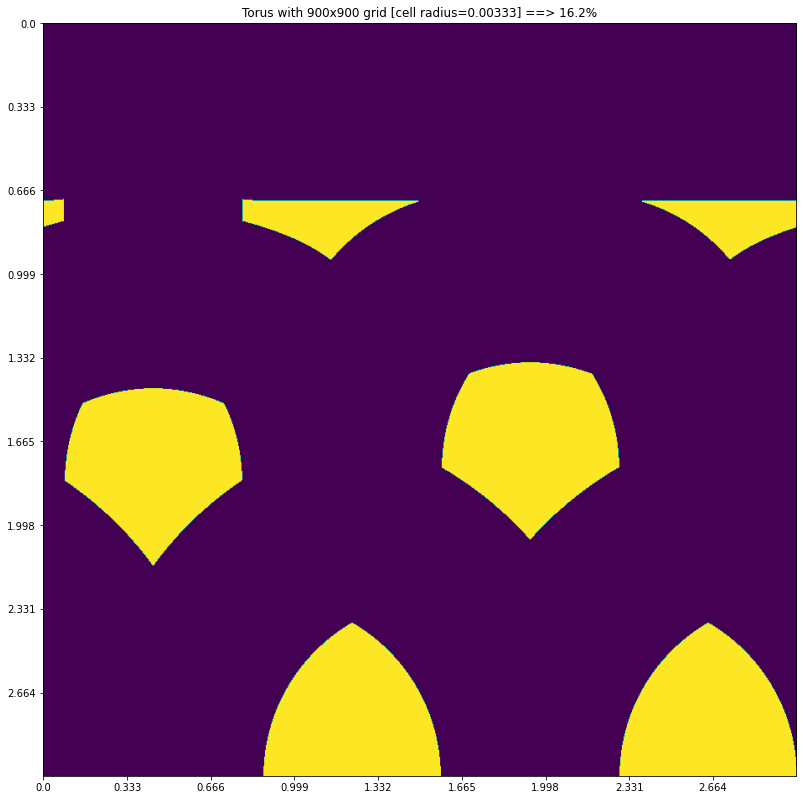

In [18]:
params_big3 = {"r":0.00333, "size":(900, 900)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(3*8,np.sqrt(3)*8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 16.2%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

In [ ]:
params_big3 = {"r":0.01, "size":(500, 866)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(3*8,np.sqrt(3)*8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 18.8%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

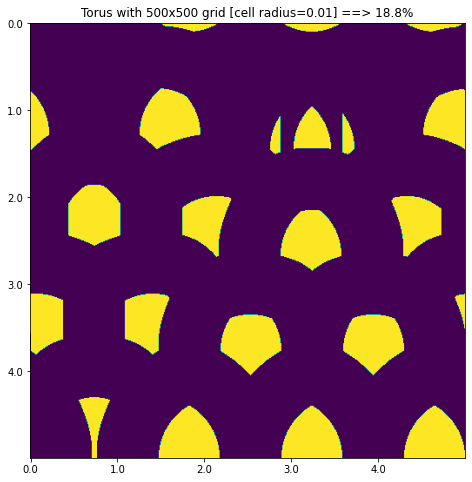

In [18]:
params_big3 = {"r":0.01, "size":(500, 500)}
N,M = params_big3["size"][0],params_big3["size"][1]

grid = SquareGrid([0,0], params_big3["r"], N,M)

arr = np.array(get_arr(params_big3), dtype=int)
plt.figure(figsize=(np.sqrt(3)*8,8))
r = params_big3["r"]

img = np.zeros(N*M)
img[arr]=1
plt.imshow(img.reshape(M,N))
plt.title(f"Torus with {N}x{M} grid [cell radius={params_big3['r']}] ==> 18.8%");
plt.xticks(np.arange(0,N,100), [str(a) for a in np.arange(0,N,100)*r]);
plt.yticks(np.arange(0,M,100), [str(a) for a in np.arange(0,M,100)*r]);

In [12]:
arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2909, 2910, 2911, 2912, 2988, 2989, 2990, 2991, 3549, 3550, 3551, 3648, 3649, 3650, 3651, 3748, 3749, 3750, 3751, 3752, 3847, 3848, 3849, 3850, 3851, 3852, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4146, 4147, 4148, 4149, 4150, 4151, 4152, 4153, 4154, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6147, 6148, 6149, 6150, 6151, 6152, 6247, 6248, 6249, 6250, 6251, 6348, 6349, 6350, 6351, 6448, 6449, 6450, 6549, 6550, 6649, 7009, 7010, 7011, 7087, 7088, 7089, 7090, 7108, 7109, 7110, 7111, 7112, 7113, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7383, 7384, 7385, 7386, 7387, 7388, 7389, 7390, 7391, 7392, 7393, 7394, 7395, 7404, 7405, 7406, 7407, 7408, 7409, 7410, 7411, 7412, 7413, 7414, 7415, 7416, 7482, 7483, 7484, 7485, 7486, 7487, 7488, 7489, 7490, 7491, 7492, 7493, 7494, 7495, 7503, 7504, 7505, 7506, 7507, 7508, 7509, 7510, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7590, 7591, 7592, 7593, 7594, 7595, 7596, 7597, 7602, 7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612, 7613, 7614, 7615, 7616, 7617, 7618, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7692, 7693, 7694, 7695, 7696, 7697, 7701, 7702, 7703, 7704, 7705, 7706, 7707, 7708, 7709, 7710, 7711, 7712, 7713, 7714, 7715, 7716, 7717, 7718, 7719, 7720, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7793, 7794, 7795, 7796, 7797, 7798, 7799, 7800, 7801, 7802, 7803, 7804, 7805, 7806, 7807, 7808, 7809, 7810, 7811, 7812, 7813, 7814, 7815, 7816, 7817, 7818, 7819, 7820, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7894, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7903, 7904, 7905, 7906, 7907, 7908, 7909, 7910, 7911, 7912, 7913, 7914, 7915, 7916, 7917, 7918, 7919, 7920, 7921, 7978, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 7994, 7995, 7996, 7997, 7998, 7999, 8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8094, 8095, 8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8276, 8277, 8278, 8279, 8280, 8281, 8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8294, 8295, 8296, 8297, 8298, 8299, 8300, 8301, 8302, 8303, 8304, 8305, 8306, 8307, 8308, 8309, 8310, 8311, 8312, 8313, 8314, 8315, 8316, 8317, 8318, 8319, 8320, 8321, 8322, 8323, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8390, 8391, 8392, 8393, 8394, 8395, 8396, 8397, 8398, 8399, 8400, 8401, 8402, 8403, 8404, 8405, 8406, 8407, 8408, 8409, 8410, 8411, 8412, 8413, 8414, 8415, 8416, 8417, 8418, 8419, 8420, 8421, 8422, 8423, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8496, 8497, 8498, 8499, 8500, 8501, 8502, 8503, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518, 8519, 8520, 8521, 8522, 8523, 8524, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8597, 8598, 8599, 8600, 8601, 8602, 8603, 8604, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8614, 8615, 8616, 8617, 8618, 8619, 8620, 8621, 8622, 8623, 8624, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8708, 8709, 8710, 8711, 8712, 8713, 8714, 8715, 8716, 8717, 8718, 8719, 8720, 8721, 8722, 8723, 8724, 8725, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 8798, 8799, 8800, 8801, 8802, 8803, 8804, 8805, 8806, 8807, 8808, 8809, 8810, 8811, 8812, 8813, 8814, 8815, 8816, 8817, 8818, 8819, 8820, 8821, 8822, 8823, 8824, 8825, 8873, 8874, 8875, 8876, 8877, 8878, 8879, 8880, 8881, 8882, 8883, 8884, 8885, 8886, 8887, 8888, 8889, 8890, 8891, 8892, 8893, 8894, 8895, 8896, 8897, 8898, 8899, 8900, 8901, 8902, 8903, 8904, 8905, 8906, 8907, 8908, 8909, 8910, 8911, 8912, 8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920, 8921, 8922, 8923, 8924, 8925, 8926, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8986, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012, 9013, 9014, 9015, 9016, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9024, 9025, 9074, 9075, 9076, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092, 9093, 9094, 9095, 9096, 9097, 9098, 9099, 9100, 9101, 9102, 9103, 9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113, 9114, 9115, 9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221, 9222, 9223, 9224, 9275, 9276, 9277, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300, 9301, 9302, 9303, 9304, 9305, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422, 9423, 9476, 9477, 9478, 9479, 9480, 9481, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9489, 9490, 9491, 9492, 9493, 9494, 9495, 9496, 9497, 9498, 9499, 9500, 9501, 9502, 9503, 9504, 9505, 9506, 9507, 9508, 9509, 9510, 9511, 9512, 9513, 9514, 9515, 9516, 9517, 9518, 9519, 9520, 9521, 9522, 9523, 9577, 9578, 9579, 9580, 9581, 9582, 9583, 9584, 9585, 9586, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599, 9600, 9601, 9602, 9603, 9604, 9605, 9606, 9607, 9608, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9619, 9620, 9621, 9622, 9677, 9678, 9679, 9680, 9681, 9682, 9683, 9684, 9685, 9686, 9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9808, 9809, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, ]

In [14]:
r = 0.02
grid = HexagonGrid([-4,4], r, 100, 100)
G = create_graph(grid.cells, r)
print(len(G.nodes), len(G.edges))

Patt begin
Patt end
10000 2410000


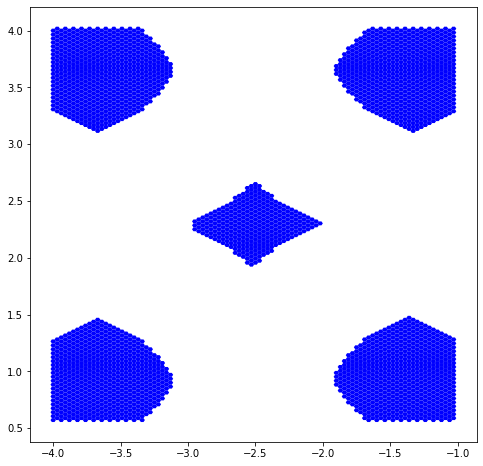

In [17]:
plt.figure(figsize=(8,8))
plot_cells(grid)

In [18]:
arr = [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 282, 283, 284, 285, 286, 287, 288, 289, 384, 385, 386, 387, 2914, 2957, 3013, 3014, 3015, 3056, 3057, 3058, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3209, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3520, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3867, 3868, 3869, 3870, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169, 4170, 4202, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4212, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4361, 4362, 4363, 4364, 4365, 4366, 4367, 4405, 4406, 4407, 4408, 4409, 4462, 4463, 4464, 4465, 4466, 4507, 4564, 6835, 6836, 6933, 6934, 6935, 6936, 6937, 6938, 7030, 7031, 7032, 7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7129, 7130, 7131, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7284, 7285, 7286, 7287, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 7343, 7344, 7345, 7383, 7384, 7385, 7386, 7387, 7388, 7426, 7427, 7428, 7429, 7430, 7431, 7432, 7433, 7434, 7435, 7436, 7437, 7438, 7439, 7440, 7441, 7442, 7443, 7444, 7445, 7482, 7483, 7484, 7485, 7486, 7487, 7488, 7489, 7527, 7528, 7529, 7530, 7531, 7532, 7533, 7534, 7535, 7536, 7537, 7538, 7539, 7540, 7541, 7542, 7543, 7544, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7590, 7627, 7628, 7629, 7630, 7631, 7632, 7633, 7634, 7635, 7636, 7637, 7638, 7639, 7640, 7641, 7642, 7643, 7644, 7680, 7681, 7682, 7683, 7684, 7685, 7686, 7687, 7688, 7689, 7690, 7691, 7727, 7728, 7729, 7730, 7731, 7732, 7733, 7734, 7735, 7736, 7737, 7738, 7739, 7740, 7741, 7742, 7743, 7744, 7779, 7780, 7781, 7782, 7783, 7784, 7785, 7786, 7787, 7788, 7789, 7790, 7791, 7792, 7827, 7828, 7829, 7830, 7831, 7832, 7833, 7834, 7835, 7836, 7837, 7838, 7839, 7840, 7841, 7842, 7843, 7844, 7878, 7879, 7880, 7881, 7882, 7883, 7884, 7885, 7886, 7887, 7888, 7889, 7890, 7891, 7892, 7893, 7928, 7929, 7930, 7931, 7932, 7933, 7934, 7935, 7936, 7937, 7938, 7939, 7940, 7941, 7942, 7943, 7978, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7988, 7989, 7990, 7991, 7992, 7993, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 8037, 8038, 8039, 8040, 8041, 8042, 8043, 8077, 8078, 8079, 8080, 8081, 8082, 8083, 8084, 8085, 8086, 8087, 8088, 8089, 8090, 8091, 8092, 8093, 8094, 8128, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8136, 8137, 8138, 8139, 8140, 8141, 8142, 8143, 8177, 8178, 8179, 8180, 8181, 8182, 8183, 8184, 8185, 8186, 8187, 8188, 8189, 8190, 8191, 8192, 8193, 8194, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 8243, 8276, 8277, 8278, 8279, 8280, 8281, 8282, 8283, 8284, 8285, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8294, 8295, 8329, 8330, 8331, 8332, 8333, 8334, 8335, 8336, 8337, 8338, 8339, 8340, 8341, 8342, 8376, 8377, 8378, 8379, 8380, 8381, 8382, 8383, 8384, 8385, 8386, 8387, 8388, 8389, 8390, 8391, 8392, 8393, 8394, 8395, 8429, 8430, 8431, 8432, 8433, 8434, 8435, 8436, 8437, 8438, 8439, 8440, 8441, 8442, 8475, 8476, 8477, 8478, 8479, 8480, 8481, 8482, 8483, 8484, 8485, 8486, 8487, 8488, 8489, 8490, 8491, 8492, 8493, 8494, 8495, 8496, 8529, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8575, 8576, 8577, 8578, 8579, 8580, 8581, 8582, 8583, 8584, 8585, 8586, 8587, 8588, 8589, 8590, 8591, 8592, 8593, 8594, 8595, 8596, 8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638, 8639, 8640, 8641, 8642, 8674, 8675, 8676, 8677, 8678, 8679, 8680, 8681, 8682, 8683, 8684, 8685, 8686, 8687, 8688, 8689, 8690, 8691, 8692, 8693, 8694, 8695, 8696, 8697, 8729, 8730, 8731, 8732, 8733, 8734, 8735, 8736, 8737, 8738, 8739, 8740, 8741, 8742, 8774, 8775, 8776, 8777, 8778, 8779, 8780, 8781, 8782, 8783, 8784, 8785, 8786, 8787, 8788, 8789, 8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 8830, 8831, 8832, 8833, 8834, 8835, 8836, 8837, 8838, 8839, 8840, 8841, 8873, 8874, 8875, 8876, 8877, 8878, 8879, 8880, 8881, 8882, 8883, 8884, 8885, 8886, 8887, 8888, 8889, 8890, 8891, 8892, 8893, 8894, 8895, 8896, 8897, 8898, 8929, 8930, 8931, 8932, 8933, 8934, 8935, 8936, 8937, 8938, 8939, 8940, 8941, 8942, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8986, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9073, 9074, 9075, 9076, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9084, 9085, 9086, 9087, 9088, 9089, 9090, 9091, 9092, 9093, 9094, 9095, 9096, 9097, 9098, 9129, 9130, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9230, 9231, 9232, 9233, 9234, 9235, 9236, 9237, 9238, 9239, 9240, 9241, 9273, 9274, 9275, 9276, 9277, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 9339, 9340, 9341, 9342, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9473, 9474, 9475, 9476, 9477, 9478, 9479, 9480, 9481, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9489, 9490, 9491, 9492, 9493, 9494, 9495, 9496, 9497, 9498, 9529, 9530, 9531, 9532, 9533, 9534, 9535, 9536, 9537, 9538, 9539, 9540, 9541, 9542, 9572, 9573, 9574, 9575, 9576, 9577, 9578, 9579, 9580, 9581, 9582, 9583, 9584, 9585, 9586, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599, 9630, 9631, 9632, 9633, 9634, 9635, 9636, 9637, 9638, 9639, 9640, 9641, 9673, 9674, 9675, 9676, 9677, 9678, 9679, 9680, 9681, 9682, 9683, 9684, 9685, 9686, 9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 9841, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9972, 9973, 9974, 9975, 9976, 9977, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999,]

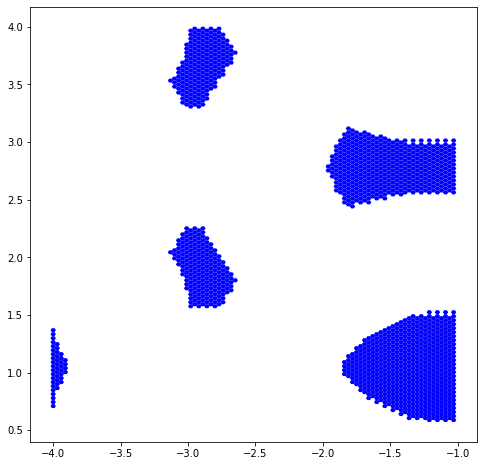

In [19]:
plt.figure(figsize=(8,8))
plot_cells(grid)

# Maximal independent set 

In [30]:
r = 0.1
grid = HexagonGrid([-4,4], r, 80, 80)
G = create_graph(grid.cells, r)
print("Graph created")

Patt begin
Patt end
Graph created


In [32]:
S = nx.maximal_independent_set(G)
len(S)/len(grid.cells)

7.475

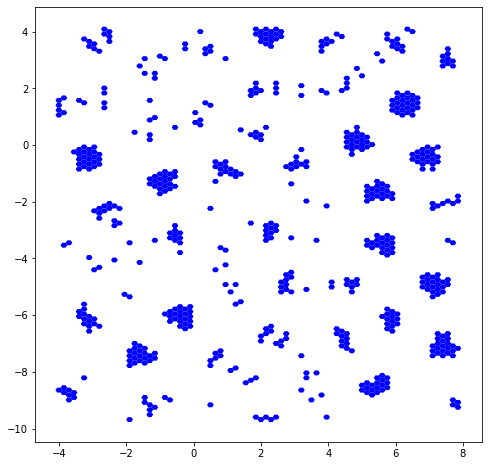

In [34]:
plt.figure(figsize=(8,8))
for i,c in grid.get_cells():
    if i in S:
        x = [t.x for t in c.node_coords]
        y = [t.y for t in c.node_coords]

        plt.fill(x,y, facecolor='b')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy

In [2]:
alpha, beta, gamma, x0, xi = 0.7227442479999999, 0.25267342368140044, 0.5953786551134962, 0.3068022165214177, 0.8480520787948966
e,f = 3.2593857445348857, 1.9999735418432287


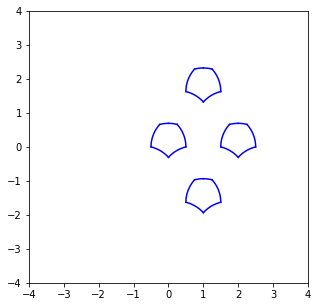

In [3]:

start = (0,0)

# === First line ===
# Defined by the bottom point
x1 = np.linspace(0,np.sin(beta),100)+start[0]
y1 = np.sqrt(1-x1**2)-x0 + start[1]

# === Second line ===
# Defined by the side point(s)
x2 = np.linspace(start[0]+np.sin(beta), start[0]+0.5, 100)+start[0]
y2 = np.sqrt(1-(x2+0.5)**2)+x0-x0+start[1]


# === Third line ===
# Defined by lower neighbours (They are in the same 60 degree line)
#eps = np.pi/3-gamma
eps = np.pi-xi
c = (np.sin(eps), -np.cos(eps))
x3 = np.linspace(0.5,0, 100)+start[0]
y3 = np.sqrt(1-(x3-c[0])**2)-c[1]-x0+start[1]


# === Plot figures ===
L = 1.2
color = 'b'

plt.figure(figsize=(5,5))

plt.xlim([-4,4])
plt.ylim([-4,4])


for x,y in [(0,0), (f/2,e/2), (f/2,-e/2), (f,0)]:
    plt.plot(x1+x,y1+y, color=color)
    plt.plot(-x1+x,y1+y, color=color)
    plt.plot(x2+x,y2+y, color=color)
    plt.plot(-x2+x,y2+y, color=color)
    plt.plot(x3+x,y3+y, color=color)
    plt.plot(-x3+x,y3+y, color=color)



In [4]:
import scipy.integrate as integrate


In [5]:
result = integrate.quad(lambda x: np.cos(x), 0, np.pi/2)

result1 = integrate.quad(lambda x: np.sqrt(1-x**2)-x0, 0,np.sin(beta))
result2 = integrate.quad(lambda x: np.sqrt(1-(x+0.5)**2)+x0-x0, np.sin(beta), 0.5)

eps = np.pi-xi
c = (np.sin(eps), -np.cos(eps))
result3 = integrate.quad(lambda x: np.sqrt(1-(x-c[0])**2)-c[1]-x0, 0.5,0)

res_all = result1[0]+result2[0]+result3[0]

print(f"A tulipán területe: {2*res_all}")

A tulipán területe: 0.6868412330893215
